# Unit 02: Computing with Data in Python

# Outline of Unit 02

- **02: Computing with Data in Python**
  - Vector
      - Vectors: assigning, accessing, visualizing
      - Vector addition, subtraction, scaling, linear combination
      - Inner products, affine function, norm, distance, angle
      - Orthogonality and linear independence
  - Matrix
      - Matrices, special matrices
      - Matrix transpose, addition, subtraction, scaling
      - Matrix-vector multiplication, Matrix-matrix multiplication
      - Column space, row space, kernel, co-kernel, rank
      - Solving systems of linear equations
      - Singular Value Decomposition

## Recap last week's discussion on vectors

**Vectors**
- Definition of a vector
- Special vectors (Zero, Ones, One-hot)
- Operations on vectors
    - Addition/Subtraction
    - Scalar-Vector multiplication
    - Elementwise Vetor multiplication
    - Inner product
    - Norm and Distance
    - Angle

**Collection of Vectors**
- Linear combinations (average, sum, affine, convex), Linear Span
- Linear dependence and Linear Independence, Basis
- Orthonormal set (normalized and orthogonal), Orthonormal Basis

### Linear combinations

$\color{#EF5645}{\text{Definition}}$: For a collection of $m$ n-vectors $a_1, . . . , a_m$ and scalars $β_1, . . . , β_m$, the vector defined as

$$β_1a_1 + · · · + β_ma_m$$

is a *linear combination* of the vectors.

### Span

$\color{#EF5645}{\text{Definition}}$: The span of $m$ n-vectors $a_1, . . . , a_m$ is the set of all possible linear combinations of the $m$ vectors,

$$\text{span}(a_1, . . . , a_m) = \left\{\beta_1 a_1 + \dots + \beta_m a_m | \forall \beta_i \in \mathbb{R}\right\}$$

### Linear Dependence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily dependent* if there exists a vector $a_i$ which can be expressed as a linear combination of the other vectors.

### Linear Independence

$\color{#EF5645}{\text{Definition}}$: A collection of $m$ n-vectors $a_1, . . . , a_m$ is *linearily independent* if no vector $a_i$ can be expressed as a linear combination of the other vectors.

### Basis

$\color{#EF5645}{\text{Definition}}$: A collection of $n$ n-vectors $a_1, . . . , a_n$ is a basis if the collection is linearily independent.

### Orthonormal Set

$\color{#EF5645}{\text{Definitions}}$: A set of k $n$-vectors $a_1, . . . , a_k$ form an *orthonormal set* if they are
- _(mutually) orthogonal_ if $a_i ⊥ a_j$ for all $i , j$
- _normalized_ if $‖a_i ‖ = 1$ for $i = 1, . . . , k$

$\color{#6D7D33}{\text{Properties}}$: If $a_1, ..., a_k$ form an orthonormal set, then:
- $k\leq n$,
- $a_1, ..., a_k$ are linearly independent.

### Orthonormal Basis

$\color{#EF5645}{\text{Definition}}$: A set of $n$ orthonormal $n$-vectors is called an _orthonormal basis_ of $\mathbb{R}^n$.

**Problem 1:** Which of the following statements is false?

- The span of the $0$ vector is always a point.
- The span of $k$ orthonormal vectors (i.e. an orthonormal set) is $k$ dimensional.
- If the span of $k$ n-vectors is less than $k$ dimensional, then the set is linearily dependent.
- A set of $k < n$ linearily independent n-vectors forms a basis.

**Problem 2:** Which of the following pairs of vectors span all of $\mathbb{R}^2$?

- $a = [0, 1], b = [0,-4]$
- $a = [1,-3]$ and $b = [-1.5, 4.5]$
- $a = [1,1]$ and $b = [0, 0]$
- $a = [1,2]$ and $b = [2,1]$

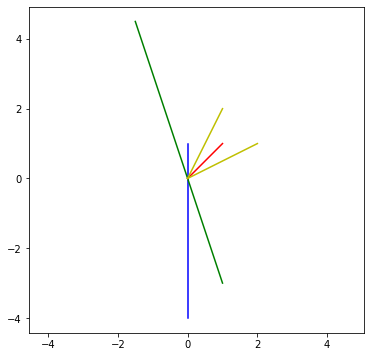

In [25]:
import numpy as np
import matplotlib.pyplot as plt

a1 = np.array([0, 1]); b1 = np.array([0, -4]);
a2 = np.array([1, -3]); b2 = np.array([-1.5, 4.5]);
a3 = np.array([1, 1]); b3 = np.array([0, 0]);
a4 = np.array([1, 2]); b4 = np.array([2, 1]);

def plotvector(a, c):
    plt.plot([0, a[0]],[0, a[1]], c=c)

fig = plt.figure(figsize=(6, 6))
plotvector(a1, c='b'); plotvector(b1, c='b');
plotvector(a2, c='g'); plotvector(b2, c='g');
plotvector(a3, c='r'); plotvector(b3, c='r');
plotvector(a4, c='y'); plotvector(b4, c='y');
plt.axis("equal")
plt.show()

**Problem 3:** Are the vectors $a_1 = [1,0,0]$, $a_2 = [0,0,-1]$, $a_3=[0,1,0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

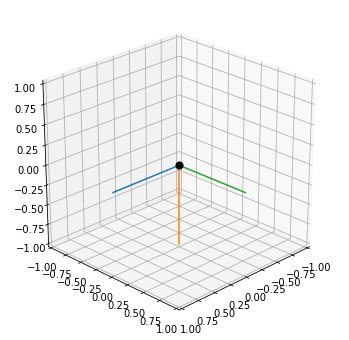

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

a1 = np.array([1, 0, 0])
a2 = np.array([0, 0, -1])
a3 = np.array([0, 1, 0])

def plot3Dvectors(A, elev=25, angle=45):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(0, 0, 0, c='k', s=50)
    for a in A:
        ax.plot(np.array([0, a[0]]), [0, a[1]], [0, a[2]])
    ax.set_xlim((-np.max(A), np.max(A)))
    ax.set_ylim((-np.max(A), np.max(A)))
    ax.set_zlim((-np.max(A), np.max(A)))
    ax.view_init(elev=elev, azim=angle)
    plt.show()

plot3Dvectors([a1, a2, a3])

**Problem 4:** Are the vectors $a_1 = [1,0,0]$, $a_2 = [0,0,-1]$, $a_3=[-1,1,0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

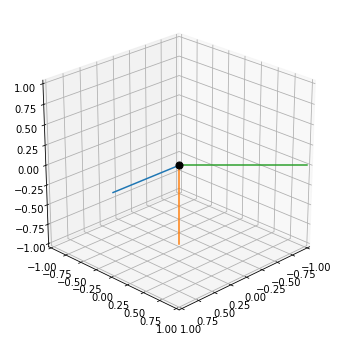

In [63]:
a1 = np.array([1, 0, 0])
a2 = np.array([0, 0, -1])
a3 = np.array([-1, 1, 0])

plot3Dvectors([a1, a2, a3], elev=25, angle=45)

**Problem 5:** Are the vectors $a_1 = [0.2,-7.0,8.6]$, $a_2 = [-0.1,2.0,-1.0]$, $a_3=[0,-1.0,2.2]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

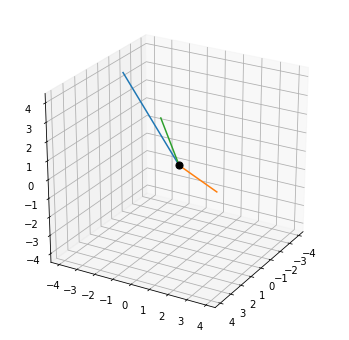

In [64]:
a1 = np.array([0.1, -3.0, 4.3])
a2 = np.array([-0.1, 2.0, -1.0])
a3 = np.array([0, -1.0, 2.3])

plot3Dvectors([a1, a2, a3], elev=25, angle=30)

**Problem 6:** Are the vectors $a_1 = [0,0,-1]$, $a_2 = [1/\sqrt{2}, 1/\sqrt{2}, 0]$, $a_3=[1/\sqrt{2}, -1/\sqrt{2}, 0]$ linearily dependent or linearily independent? Do they form a basis? Do they form an orthonormal basis?

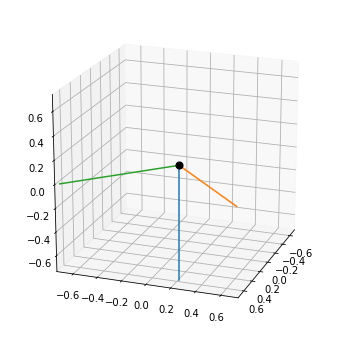

In [72]:
a1 = np.array([0, 0, -1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])

plot3Dvectors([a1, a2, a3], elev=20, angle=20)

**Problem 7:** Suppose $a_1,\dots,a_k$ are orthonormal n-vectors and $x = \beta_1 a_1 + \dots + \beta_k a_k$ is a linear combination determined by the scalars $\beta_1,\dots,\beta_k$.  What is the norm $\|x\|$?

In [77]:
# First Example Orthonormal set
a1 = np.array([0, 0, -1])
a2 = np.array([1/np.sqrt(2), 1/np.sqrt(2), 0])
a3 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])
b = np.array([-1, 3, 6])
x = b[0] * a1 + b[1] * a2 + b[2] * a3
print(np.linalg.norm(b))


# Second Example Orthonormal set
a1 = np.array([1,0,0,0])
a2 = np.array([0,1,0,0])
a3 = np.array([0,0,1,0])
b = np.array([-1, 3, 6])
x = b[0] * a1 + b[1] * a2 + b[2] * a3
print(np.linalg.norm(b))

6.782329983125268
6.782329983125268


**Problem 8:** Suppose $a$ and $b$ are any non-zero n-vectors. What is the value of $\gamma$ such that $(a - \gamma b) \perp b$?
- $\gamma = a^\intercal b$
- $\gamma = \|b\|$
- $\gamma = a^\intercal b / \|b\|$
- $\gamma = a^\intercal b / \|b\|^2$

In [16]:
a = np.array([3, -2, -1, 2, 0])
b = np.array([-1, 3, 6, 1, -3])

gamma1 = np.dot(a, b)
gamma2 = np.linalg.norm(b)
gamma3 = np.dot(a, b) / np.linalg.norm(b)
gamma4 = np.dot(a, b) / np.linalg.norm(b)**2

c = a - gamma1 * b

print(np.dot(c, b))

# 1. What is a Matrix

<center><img src="figs/06_matrix_everywhere.gif" alt="default", width=1000px/></center>

## Definition of a Matrix

$\color{#EF5645}{\text{Definition}}$: A _matrix_ is a rectangular array of numbers, e.g.:
$$A =\begin{vmatrix}
0   & 1  & -2.3  \\
1.3 & 4  & -0.1 
\end{vmatrix}$$

- Its _size_ or _shape_ is: (number of rows) x (number of columns).
- Its elements are called: _entries, coefficients_.
- $A_{i, j}$ refers to element at ith row and jth column.
  - i is the _row index_ and j is the _column index_.
  
$\color{#EF5645}{\text{Remark:}}$ We often denote a matrix with a capital letter such as A and vectors with a lower case letter such as a.

### Examples in ECE and beyond


- Weather: $A_{ij}$ is rainfall data at location $i$ on day $j$.
- Finances: $A_{ij}$ is the return of asset $i$ in period $j$.
- Images: $A_{ij}$ is intensity value at $i, j$.

$\color{#003660}{\text{In Python}}$, we use `numpy` and `np.array` to build matrices. We compute its shape with `shape`.

In [1]:
import numpy as np

A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])
print(np.shape(A))
print(A.shape)

(2, 3)
(2, 3)


$\color{#003660}{\text{In Python}}$, we can access the elements of the matrix.

In [ ]:
A = np.array([
    [0, 1, -2.3], 
    [1.3, 4, -0.1]
])

print(A[0, 0])
print(A[0, 2])

## Sizes/Shapes of Matrices

$\color{#EF5645}{\text{Definitions}}$: A $n \times m$ matrix $A$ is:
- _tall_ if n > m (more rows than columns)
- _wide_ if n < m (more columns than rows)
- _square_ if n = m (same columns as rows)

$\color{#EF5645}{\text{Special cases}}$:
- A 1 x 1 matrix is a number or scalar.
- A n x 1 matrix is an $n$-vector.
- A 1 x m matrix is a $m$-row-vector. 

Starting now, we will distinguish vectors and row vectors.

## Column representation of a matrix

An $n \times m$ matrix $A$ can be repersented an ordered collection of m n-vectors $a_1, ..., a_n$:
  $$A = [a_1 ... a_n]$$
The jth column of $A$ is the $n$-vector:
$$a_j = \begin{vmatrix}
A_{1j} \\
\vdots \\
A_{nj}
\end{vmatrix}$$

## Row representation of a matrix
An $n \times m$ matrix $A$ can be repersented an ordered collection of n m-row-vectors $b_1, ..., b_n$:
  $$A = \begin{vmatrix}
  b_1 \\
  \vdots \\
  b_m
  \end{vmatrix}$$
The ith row is the $m$-row-vector: 
$$[A_{i1}, ..., A_{im}]$$

## Slices of a matrix

$\color{#EF5645}{\text{Definition}}$ The slice of matrix $A_{p:q, r:s}$ is the matrix:
$$\begin{vmatrix}
A_{pr} & A_{p, r+1} & ... & A_{ps}  \\
... & ... & ... & ... \\
A_{qr} & A_{q, r+1} & ... & A_{qs}
\end{vmatrix}.$$

$\color{#003660}{\text{In Python}}$, we can extract rows, columns and slices:

In [93]:
A = np.array([
    [1.1, 2.2, 3.3], 
    [4.4, 5.5, 6.6], 
    [7.7, 8.8, 9.9]]) 
print("Matrix:")
print(A)

print("Columns:")
print(A[:,0]); print(A[:,1]); print(A[:,2])

print("Rows:")
print(A[0, :]); print(A[:, 1]); print(A[0, 1])

print("Matrix Slice:")
A[0:2, 1:3]

Matrix:
[[1.1 2.2 3.3]
 [4.4 5.5 6.6]
 [7.7 8.8 9.9]]
Columns:
[1.1 4.4 7.7]
[2.2 5.5 8.8]
[3.3 6.6 9.9]
Rows:
[1.1 2.2 3.3]
[2.2 5.5 8.8]
2.2
Matrix Slice:


array([[2.2, 3.3],
       [5.5, 6.6]])

## Special Matrices

### Zero Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times m$ matrix with all entries 0 is denoted $0_{n \times m}$ or just $0$ and is called a _zero matrix_. 

### Ones Matrix

$\color{#EF5645}{\text{Definition}}$: $n \times m$ matrix with all entries 1 is denoted $1_{n \times m}$ or just $1$ and is called a _ones matrix_.

### Identity Matrix

$\color{#EF5645}{\text{Definition}}$: The $n \times n$ matrix with all entries 0 except the diagonal elements are 1 is denoted $I_n$ or just $I$ is the _identity matrix_.

$\color{#003660}{\text{In Python}}$, we use `zeros` , `ones`, and `identity` or `eye` (from `numpy`) to build these vectors.

In [94]:
n, m = 10, 5

zero = np.zeros((n,m))
print(zero)

ones = np.ones((n,m))
print(ones)

I = np.eye(n)
I = np.identity(n)
print(I)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


$\color{#047C91}{\text{Exercise}}$: How many elements of an $n$ identity matrix are zero?

In [90]:
n = 10
I = np.eye(n)
num_zero = np.sum(I == 0)

print(num_zero)
print(n * (n - 1))

90
90


# Operations on Matrices

## Operations that directly follow from vector operations

### Matrix Addition and Subtraction

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices A and B can be added or subtracted to give a new $n \times m$ matrix:
$$(A + B)_{ij} = A_{ij} + B_{ij}.$$

### Scalar-Matrix multiplication

$\color{#EF5645}{\text{Definition}}$: A scalar β and an $n \times m$ matrix a can be multiplied to give a new $n \times m$ matrix: 
$$(βA)_{ij} = \beta A_{ij}.$$

### Elementwise-multiplication (Hadamard Product)

$\color{#EF5645}{\text{Definition}}$: Two $n \times m$ matrices $A$ amd $B$ can be multiplied to give a new $n \times m$ matrix: 
$$(A \odot B)_{ij} = A_{ij}B_{ij}.$$

## Frobenius Norm

$\color{#EF5645}{\text{Definition}}$: For a $m \times n$ matrix $A$, we define the _matrix norm_ as:

<center>
$||A|| = \sqrt{\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2}.$</center>

$\color{#EF5645}{\text{Remark}}$: This definition agrees with the definition of norm of vectors when $n=1$ or $m=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the matrix norm of $A = \begin{vmatrix}
1 & 0 & -1\\
0 & 1 & 1 \end{vmatrix}.$

$\color{#003660}{\text{In Python}}$, we use `np.linalg.norm`.

In [27]:
import numpy as np

A = np.array([
    [1, 0, -1],
    [0, 1, 1]
])
print(np.linalg.norm(A))

2.0


## Transpose

$\color{#EF5645}{\text{Definition}}$: The _transpose of an $m \times n$ matrix_ $A$ is a $n \times m$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,..., n \quad j=1,...,m$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$


$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

[[ 1  0 -1]
 [ 0  1  0]
 [ 0  2 -3]]
[[ 1  0  0]
 [ 0  1  2]
 [-1  0 -3]]


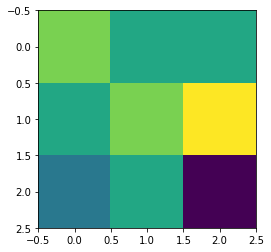

In [14]:
import matplotlib.pylab as plt

A = np.array([
    [1, 0, -1],
    [0, 1, 0],
    [0, 2, -3]
])

print(A)
print(A.T)
plt.imshow(A)
plt.imshow(A.T)

## Trace

$\color{#EF5645}{\text{Definition}}$: The _trace of an $m \times n$ matrix_ $A$ is a $n \times m$ matrix, written $A^T$, and is defined by:
$$ (A^T)_{ij} = A_{ji}, \quad i = 1,..., n \quad j=1,...,m$$

$\color{#047C91}{\text{Example}}$: $\begin{vmatrix}
0.2 & 1.2 & 10 \\
0 & -3 & 0
\end{vmatrix}^T = \begin{vmatrix}
0.2 & 0 \\
1.2 & -3 \\
10 & 0
\end{vmatrix}$


$\color{#6D7D33}{\text{Property}}$: The transpose verifies:
- $(A^T)^T = A$
- $(A + B)^T = A^T + B^T$

## Matrix-Vector Multiplication

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ amd $b$ can be multiplied to give a new vector: 
$$a \odot b = ( a_1b_1, . . . , a_nb_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute the hadamard product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

### Outer-Product

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ amd $b$ can be multiplied to give a new vector: 
$$a \odot b = ( a_1b_1, . . . , a_nb_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute the hadamard product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

## Matrix-Matrix Multiplication

$\color{#EF5645}{\text{Definition}}$: Two $n$-vectors $a$ amd $b$ can be multiplied to give a new vector: 
$$a \odot b = ( a_1b_1, . . . , a_nb_n).$$

$\color{#047C91}{\text{Exercise}}$: Compute the hadamard product of $a = (1, 0, 2)$ and $b = (-1, 1, 2)$.

# Speicial Square Matrices

### Diagonal Matrices

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $A$ is a square matrix with $A_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $A_{ii} = a_i$:
$$\text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

$\color{#003660}{\text{In Python}}$, we use `np.diag` to create a diagonal matrix from a vector $a$.

In [19]:
np.diag(np.array([2.2, 3.3, 4.4]))

array([[2.2, 0. , 0. ],
       [0. , 3.3, 0. ],
       [0. , 0. , 4.4]])

## Triangular Matrices

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $A$ is a square matrix with $A_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $A_{ii} = a_i$:
$$\text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

## Symmetric Matrices

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $A$ is a square matrix with $A_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $A_{ii} = a_i$:
$$\text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

## Orthogonal Matrices

$\color{#EF5645}{\text{Definition}}$: A _diagonal matrix_ $A$ is a square matrix with $A_{ij} = 0$ for $i \neq j$.
- diag$(a_1, ..., a_n)$ denotes the diagonal matrix with $A_{ii} = a_i$:
$$\text{diag}(0.2, -3, 1.2) = \begin{vmatrix}
0.2 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & 1.2
\end{vmatrix}$$

## Recap

**Matrices**
- Definition of a Matrix
- Special matrices (Zero, Ones, One-hot)
- Operations on vectors
    - Addition/Subtraction
    - Scalar-Vector multiplication
    - Elementwise Vetor multiplication
    - Inner product
    - Norm and Distance
    - Angle
- Special square matrices
    - 
    -
    -
    -

# Solving Systems of Linear Equations

### Orthonormal Expansion

$\color{#6D7D33}{\text{Property}}$: If $a_1, . . . , a_n$ is an orthonormal basis of $\mathbb{R}^n$, then:
- Any $n$-vector $x$ can be written:
$$x = (a^T_1 x)a_1 + · · · + (a^T_n x)a_n.$$

$\color{#EF5645}{\text{Definition}}$: The formula above is called _orthonormal expansion of $x$_ in the orthonormal basis. 

<h1>Learn Python Pandas, Packages, and Modules</h1>


<b>Web Resources</b>
<br> <a href='https://docs.python.org/3/tutorial/modules.html#packages'>Docs.python.org - Packages</a>


#### <b>What are Python Modules?</b>

Modules are simply python files (.py) which contain python code. This code can define functions, classes, variables etc.


#### <b>Why do we use Modules?</b>

Modules allow us to organize our code by grouping related functionalities, which makes it easier to use and understand. Writing code into smaller, more manageable pieces will help you 1) debug easier, 2) create reusable code and 3) make the code more understandable to the end user.

#### <b>How do we use Modules?</b>

We can use the code in a module by using the <b>import</b> function. For example, let's say we created a .py file called 'Square.py'. Inside this file we defined a function called <b>calculateSquare</b>. 
```python
def calculateSquare(x):
    return x**2
```
We can use the <b>calculateSquare</b> function by using either of the following commands:

```python
import Square 
x = 2
print(Square.calculateSquare(x))

#Output: 4

from Square import calculateSquare
x = 2
print(calculateSquare(x))

#Output: 4

from Square import * #The asterisk imports all functions in the module [not always best practice]
x = 2
print(calculateSquare(x))

#Output: 4
```

#### <b>Where can I find more information on Modules?</b>

[Official python documentation on modules](https://docs.python.org/3.7/tutorial/modules.html)

<h1>Packages</h1>

#### <b>What are Python Packages?</b>

Python packages are an organized collection of related python modules in a single directory. 

#### <b>How do we use Packages?</b>

Packages are used exactly like modules (see the Modules section above).

#### <b>What are some common Packages?</b>

Below are some of the most widely used modules in finance and data science for data analysis:
- Pandas
- Numpy
- Scipy
- Scikit-Learn

Visualizations and dashboard creation:
- Matplotlib
- ipywidgets


In [8]:
###IMPORT PANDAS AND NUMPY PACKAGES###
import numpy as np

###CREATING A SERIES###
a = [1,2,3]
b = [1,2,3]
print(a + b)

[1, 2, 3, 1, 2, 3]


In [13]:
###CREATING A TIMESERIES BASED DATAFRAME###
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 3), index=dates, columns=list('ABC'))
df

,A,B,C
2013-01-01,0.169424,0.166691,-2.385720
2013-01-02,0.542676,0.978059,1.152731
2013-01-03,-0.547186,0.918728,2.226278
2013-01-04,1.033752,-0.712600,1.169230
2013-01-05,-0.534291,0.985898,-1.705124
2013-01-06,0.485850,0.085890,1.870669


In [14]:
###GET DATA FOR A SINGLE COLUMN###
df['A']

2013-01-01    0.169424
2013-01-02    0.542676
2013-01-03   -0.547186
2013-01-04    1.033752
2013-01-05   -0.534291
2013-01-06    0.485850
Freq: D, Name: A, dtype: float64

In [15]:
###CALCULATE SUMMARY STATISTICS###
df.describe()

,A,B,C
count,6.000000,6.000000,6.000000
mean,0.191704,0.403778,0.388011
std,0.631232,0.683725,1.941515
min,-0.547186,-0.712600,-2.385720
25%,-0.358362,0.106090,-0.990660
50%,0.327637,0.542709,1.160980
75%,0.528469,0.963226,1.695309
max,1.033752,0.985898,2.226278


In [16]:
###GET THE NUMBER OF ROWS AND COLUMNS###
df.shape

(6, 3)

In [17]:
###GET THE NUMBER OF ROWS ONLY###
len(df)

6

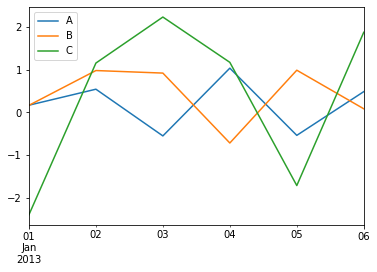

In [18]:
###PLOT THE DATAFRAME###
%matplotlib inline
df.plot()

# Learn Python File I/O


<b>Web Resources</b>
<br> <a href='https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files'>Docs.python.org - Reading and Writing Files</a>


#### <b>What is I/O?</b>

I/O, or input/output, is communication between a computer and the outside world.

Inputs are signals received by the computer. The computer can get inputs from hardware like a keyboard and mouse or from other computers via the internet. Outputs are signals sent by the computer. Your monitor is probably the most obvious output device. An internet modem is an example of a device that both receives inputs (web-pages loading on your browser) and sends outputs (outbound emails).

     
#### <b>Why do we use I/O?</b>

You can always define data directly in your python code:

```python
example_data = [1, 2, 3, 4, 5]
answer = function(example_data)
```


This is a great way to test functionality but isn't sustainable in the long term. It would be much easier if we could read in data from a file or API as well as write data down to files. This saves us having to manually define data and scales our solutions to handle arbitrary datasets.

## Files

Common file types you likely interact with are CSV and Excel files. The pandas library has a number of convenience functions for reading data from these files and converting them directly into dataframes.

```python
import pandas as pd

csv_dataframe = pd.read_csv('csv_file.csv')
excel_dataframe = pd.read_excel('excel_file.xlsx')
```

Each method accepts the path of the data file as an argument. File paths without a `/` indicate that the data file is in the same directory as the notebook we're writing our code in. If we want to read from a file inside a folder, then we'll need to update the file path, e.g. `folder/csv_file.csv`.

Both methods accept a number of different optional parameters for defining more precisely how you want them to read the data. Visit the [I/O section](https://pandas.pydata.org/docs/reference/io.html) of the online pandas documentation to learn more about these functions.

We can use the `%pwd` [Jupyter magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to find the local directory. Running the following code snippet in a project cell will print the path of your local directory:

```python
x = %pwd
print(x)
```

### Resources
Python has a rich library of packages and functions for dealing with files. [This online tutorial](https://www.programiz.com/python-programming/file-operation) explains in more detail how to use python to deal with File I/O (input and output).

### File IO Examples

1. You're writing some code inside `notebook.ipynb` and want to read the data from `bonds.csv` which is inside the `data` folder (see below). What file path do you need to specify to read the data into a dataframe: `pd.read_csv(...)`?

```
notebook.ipynb
data/
└── bonds.csv
```
`pd.read_csv('data/bonds.csv')`

2. You have a CSV with 3 blank rows at the top of the file. What parameter do you need to pass to the `read_csv` function to ignore these blank rows when reading in the data?

`skiprows=3`

3. A colleague has sent you some tabular data in a [JSON file](https://www.w3schools.com/js/js_json_intro.asp) that you've moved into the same folder as your notebook. You can use pandas to read this data into a dataframe:

`pd.read_json`

In [19]:
###RENAME COLUMNS###
df = df.rename(columns={"A":"X","B":"Y","C":"Z"})
df

,X,Y,Z
2013-01-01,0.169424,0.166691,-2.385720
2013-01-02,0.542676,0.978059,1.152731
2013-01-03,-0.547186,0.918728,2.226278
2013-01-04,1.033752,-0.712600,1.169230
2013-01-05,-0.534291,0.985898,-1.705124
2013-01-06,0.485850,0.085890,1.870669


### Math operations as matrices
$\color{#047C91}{\text{Example}}$: The $(n-1) \times n$ difference matrix:
$$D = \begin{vmatrix}
-1 & 1  & 0 & ... & 0 & 0 \\
0  & -1 & 1 & ... & 0 & 0 \\
   &    &   &     &   &   \\
0  & 0  & 0 & ... & -1 & 1
\end{vmatrix}$$
gives the $(n-1)$ vector of differences:
$Dx = \begin{vmatrix}
x_2 - x_1 \\
x_3 - x_2 \\
\vdots \\
x_n - x_{n-1}
\end{vmatrix}
$

$\color{#003660}{\text{In Python}}$, let be given a vector listing the days at which earthquakes have happened in California. Compute the vector giving the number of days in-between earthquakes.

In [ ]:
earthquake_days = np.array([12, 44, 78])
D = np.array([
    [-1, 1, 0],
    [0, -1, 1]
])

print(D @ earthquake_days)
print(45 - 12)
print(78 - 45)

In [1]:
# Remove below because they haven't see matrix-vector mult yet

### Geometric transformations as matrices

Geometric transformations can be represented as matrices. They transform vectors $x$ through: $y = Ax$.

$\color{#047C91}{\text{Example}}$: Rotation by $\theta$:
$$R_\theta = \begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)\end{vmatrix}, \quad y = R_\theta x$$


<center><img src="figs/06_rotmat.png" alt="default"/></center>

In [ ]:
import matplotlib.pyplot as plt
x = np.array([1, 1])
plt.arrow(0, 0, x[0], x[1], width=0.01, color="blue")
theta = np.pi / 6
R = np.array([
    [np.cos(theta), - np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]])
y = R @ x; 
plt.arrow(0, 0, y[0], y[1], width=0.01, color="red"); 
plt.axis("equal");

### (Social) graphs as matrices

Any (social network) graph with $n$ nodes can be represented by $n \times n$ matrix $A$, called adjacency matrix and defined as

$A_{ij} = \begin{vmatrix}
    1 \quad \text{if $i$ goes to $j$}\\
    0 \quad \text{otherwise}
\end{vmatrix}.$

<center><img src="figs/06_graph.png" alt="default" width=350px /></center>

### Block matrices

$\color{#EF5645}{\text{Definition}}$: A matrix $A$ composed from other matrices is called a _block matrix_:
$$A = \begin{vmatrix}
B & C  \\
D & E
\end{vmatrix}$$
where $B, C, D, E$ are called _submatrices_ or _blocks_ of $A$.

$\color{#003660}{\text{In Python}}$, we use `imshow` to plot an image.

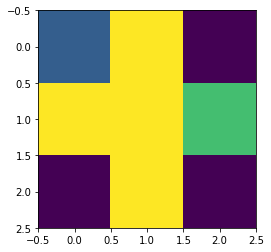

In [95]:
A = np.array([[0.3, 1, 0],[1, 1, 0.7],[0, 1, 0]]); A
import matplotlib.pyplot as plt
plt.imshow(A, cmap="viridis");